Step 1 - Business Understanding

In [ ]:
#Business Problem: Classify iris flowers into species based on measured features
#Goal: Build a classification model that predicts the iris species from sepal and petal measurements
#Usefulness: Such a model can support automated plant identification
#Task type: Supervised learning for multi-class specification

Step 2 - Data Understanding

In [2]:
#Import libraries
#Import pandas for loading and exploring tabular data
import pandas as pd
#Import numpy for basic numerical operations
import numpy as np
#Import matplotlib for plotting
import matplotlib.pyplot as plt
#Import seaborn for statistical visualisations
import seaborn as sns
#Enable inline plotting so figures appear in the notebook
%matplotlib inline

In [3]:
#Load and explore dataset
#Load the Iris dataset from a CSV file into pandas DataFrame
df = pd.read_csv('Iris.csv')

In [4]:
#Show the first 5 rows to get an intial look at the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [7]:
#Display information about columns, data types and non-null counts
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [6]:
#Display information about columns, data types and non-null counts
print("Descriptive statistics of the dataset:")
print(df.describe())


Descriptive statistics of the dataset:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
#Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


<Figure size 600x600 with 0 Axes>

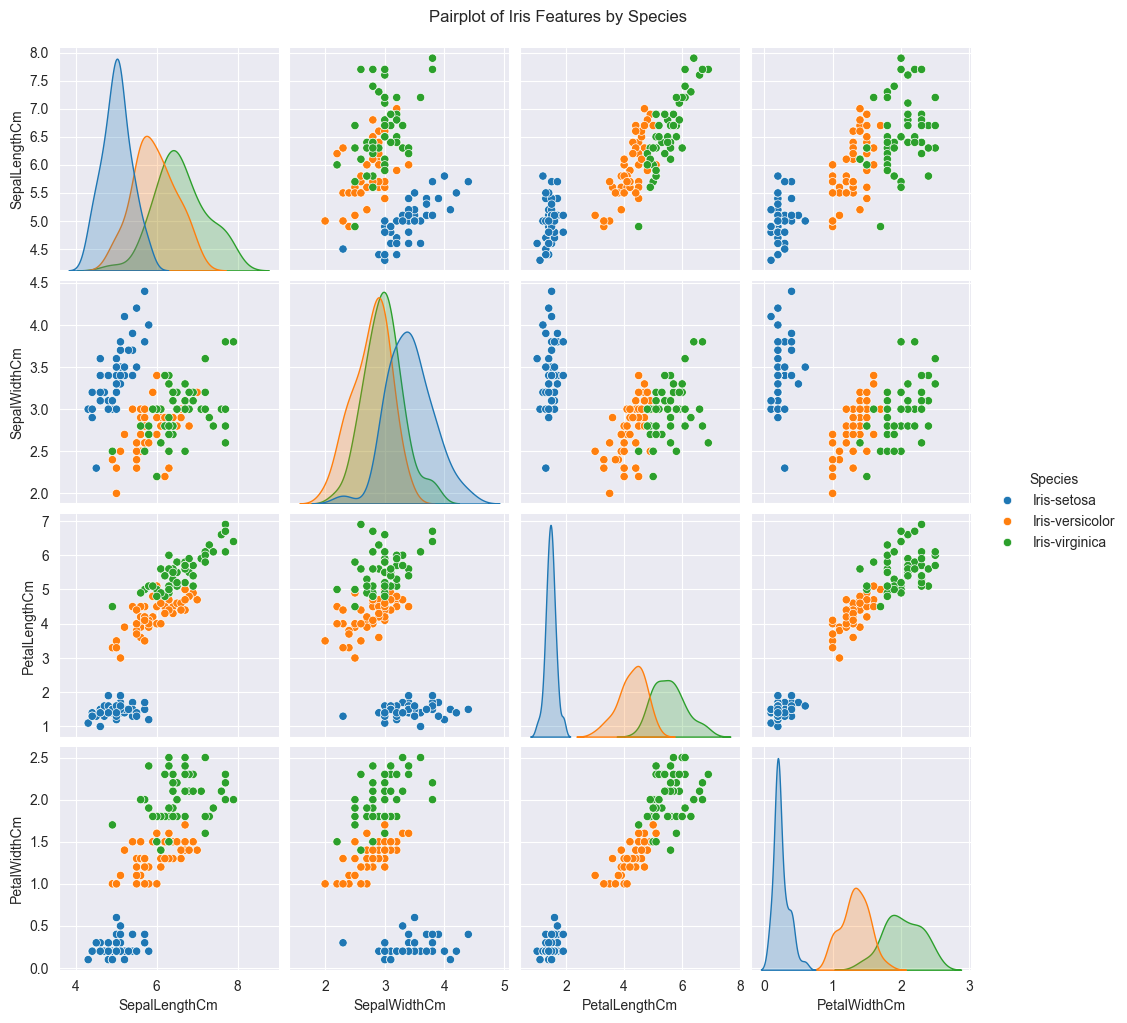

In [9]:
#Plot pairwise relationships between numeric features coloured by species
#Here we exclude the 'Id' column from plotting because it is just an identifier
#Set figsize
plt.figure(figsize=(6,6))
#Create pairplot coloured by target class
sns.pairplot(df.drop("Id", axis=1), hue="Species")
#Add title slightly above
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
#Display the plot
plt.show()

Step 3 - Data Preparation

In [10]:
#View the column names in the dataset
print("Columns:")
print(df.columns)

Columns:
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [12]:
#Separate (independent variables) and target (dependent variable)
#Drop the "Species" column (target) and 'Id' column (identifier) from the features
#Feature matrix without target and Id
X = df.drop(["Species", "Id"], axis=1)
#Target vector is the Species column
y = df["Species"]

#Import train_test_split to data into training and test sets
from sklearn.model_selection import train_test_split

#Split the dataset into training and test sets
#test_size=0.2 means 20 percent of samples are used for testing
#random_state is set for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Print the shapes of the resulting arrays to confirm the split
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [13]:
#Import StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

#Create an instance of the scaler
scaler = StandardScaler()

#Fit the scaler on the training feature data and transform it
X_train_scaled = scaler.fit_transform(X_train)

#Use the fitted scaler to transform the test feature data
X_test_scaled = scaler.transform(X_test)

#Print a message to confirm that scaling is done
print("\nFeature scaling is completed.")


Feature scaling is completed.


Step 4 - Modelling

In [14]:
#Import libraries
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
#Import KNN
from sklearn.neighbors import KNeighborsClassifier

#Create Logistic Regression model
#Initialise Logistic Regression
log_reg = LogisticRegression(max_iter=200)

#Train logistic regression
#Fit model
log_reg.fit(X_train_scaled, y_train)

#Create KNN model
#Initialise KNN with 5 neighbours
knn = KNeighborsClassifier(n_neighbors=5)

#Train KNN
#Fit model
knn.fit(X_train_scaled, y_train)

print("Logistic Regression and KNN models trained successfully.")

Logistic Regression and KNN models trained successfully.


Step 5 - Evaluation

In [15]:
#Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Predictions for each model
#Predict using Logistic Regression
y_pred_log = log_reg.predict(X_test_scaled)

#Predict using KNN
y_pred_knn = knn.predict(X_test_scaled)

#Accuracy scores
#Accuracy for Logistic Regression
acc_log = accuracy_score(y_test, y_pred_log)
#Accuracy for KNN
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"KNN Accuracy: {acc_knn:.3f}")

#Classification Reports
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test,y_pred_log))

print("KNN Classification Report:")
print(classification_report(y_test,y_pred_knn))

Logistic Regression Accuracy: 1.000
KNN Accuracy: 1.000

Logistic Regression Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

KNN Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



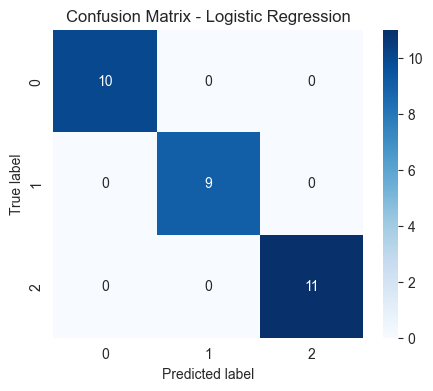

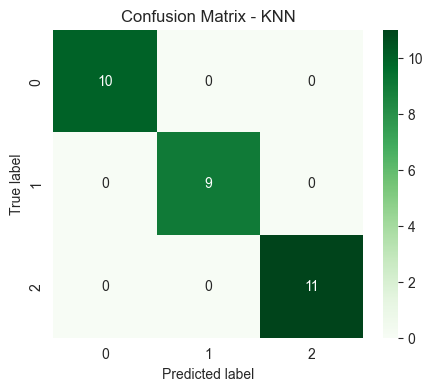

In [16]:
#Confusion Matrices
#Confusion matrix for Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)

#Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

#Plot confusion matrix for logistic regression
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

#Plot Confusion Matrix for KNN
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - KNN")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

Step 6 - Deployment and Next Steps

In [17]:
#Import joblib to save and load the trained model and scaler
import joblib

#Define filenames for the saved model and scaler objects
model_filename = "iris_logistic_regression_model.joblib"
scaler_filename = "iris_scaler.joblib"

#Save the trained classifier to a file
joblib.dump(log_reg, model_filename)

#Save the fitted scaler to a file as well
joblib.dump(scaler, scaler_filename)

#Print confirmation messages for saving operations
print(f"Model saved as {model_filename}")
print(f"Scaler saved as {scaler_filename}")

Model saved as iris_logistic_regression_model.joblib
Scaler saved as iris_scaler.joblib


In [ ]:
#Load the model back from the file to simulate deployment usage
loaded_model = joblib.load(model_filename)

#Load the scaler back from the file as well
loaded_scaler = joblib.load(scaler_filename)

#Take a single sample from the test set to demonstrate prediction
#Select one row from the original test features
sample_features = X.test.iloc[[0]]
#Get the true label for this sample
sample_true_label = y_test.iloc[[0]]

#Scale the sample features using the loaded scaler
sample_features_scaled = loaded_scaler.transform(sample_features)

#Use the loaded model to predict the species for the sample
sample_prediction = loaded_model.predict(sample_features_scaled)

#Predict the true label and predicted label for comparison
print("\nDeployment example prediction:")
print("True species label:", sample_true_label)
print("Predicted species label:", sample_prediction[0])

#Print ideas for real world deployment
print("\nPossible deployment options:")
print("1. Wrap the model in a web API so external applications can send feature values and receive predictions.")
print("2. Integrate the model into a simple web dashboard for educators or students ")
print("3. Package the model into a small application that identifies iris species from user entered measurements.")